# Project 2 of Udacity Data Analyst Nanodegree

** Analyzing Titanic passenger survival dataset **

In this ipython notebook, we are going to analyze the Titanic Passenger dataset as provided by udacity.

From [Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic)...
>RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the 2,224 passengers and crew aboard, more than 1,500 died in the sinking, making it one of the deadliest commercial peacetime maritime disasters in modern history.

The Question we are going to answer is...

What are the charcteristics of passengers who survived compared to the ones who didnt?


In [1]:
# Let's import the necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv dataset file into a pandas DataFrame. 
titanic_df = pd.read_csv('titanic_data.csv')

In [3]:
# Let's look at some of the rows from the data to get some sense of what we are dealing with.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** Notes so far...**
* This dataset has 891 rows corresponding to 891 passengers. So this is clearly a subset of the complete dataset, which should have 2224 rows(same number as passengers on the RMS Titanic).
* We have some missing values in the Age column where only 714 records out of 891 have age value.

Now, Let's look at the various columns on what kind of data we have in them. One way to do that is to look at how many different kind of values each column has.

In [6]:
def column_uniques(column):
    unique_values = list(column.unique())
    count_unique = len(unique_values)
    return column.name, count_unique, unique_values
            
#column_uniques(titanic_df['Sex'])    
print titanic_df.apply(column_uniques)

PassengerId    (PassengerId, 891, [1, 2, 3, 4, 5, 6, 7, 8, 9,...
Survived                                   (Survived, 2, [0, 1])
Pclass                                    (Pclass, 3, [3, 1, 2])
Name           (Name, 891, [Braund, Mr. Owen Harris, Cumings,...
Sex                                     (Sex, 2, [male, female])
Age            (Age, 89, [22.0, 38.0, 26.0, 35.0, nan, 54.0, ...
SibSp                          (SibSp, 7, [1, 0, 3, 4, 2, 5, 8])
Parch                          (Parch, 7, [0, 1, 2, 5, 3, 4, 6])
Ticket         (Ticket, 681, [A/5 21171, PC 17599, STON/O2. 3...
Fare           (Fare, 248, [7.25, 71.2833, 7.925, 53.1, 8.05,...
Cabin          (Cabin, 148, [nan, C85, C123, E46, G6, C103, D...
Embarked                           (Embarked, 4, [S, C, Q, nan])
dtype: object


We have some seen notable things about the days so far...
* We got the 'Survived field which has either of 2 values - 0 or 1. 0 means the passenger didn't survive, 1 means the passenger survived. 
* Sex field got either of 2 values male or female. 
* Pclass column has 3 kinds of values - 1,2 or 3.
* Age has numeric values ranging from 0.42 to 80. Also, there are 177 records which has no age value. We would need to take care of these when visualizing the data by age.
* SibSp stands for total number of siblings and/or spouse the passenger had with onboard. The values range from 0 to 8 with no passengers having 6 or 7.
* Parch stands for Number of parents/children abroad
* We can ignore the PassengerId as it's a unique id field for every passenger. 
* We can also ignore Name, Cabin, Ticket and Emabrked.
* Fare can be safely ignored also as Pclass seems to be a better predictor of the wealth of the passenger.

So, we are going to look at how below fields' values affected the survival (0 or 1). 
* Sex
* Age
* Pclass

Let's explore this further by grouping the data on these fields...

Sex       female  male
Survived              
0             81   468
1            233   109


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aa86cefd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f8aa865c150>], dtype=object)

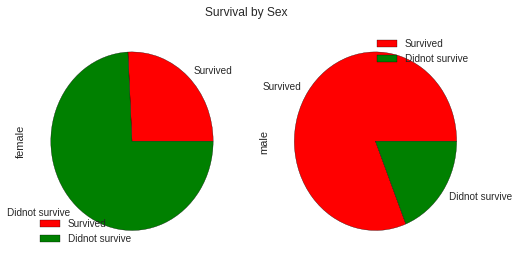

In [64]:
# group by sex and run the visualizations
sex_grouping = titanic_df[['Sex', 'Survived']].groupby(['Survived', 'Sex', ]).size()
sex_grouping_unstacked = sex_grouping.unstack()
print sex_grouping_unstacked
plt.figure()
#sex_grouping_unstacked.plot.barh(color='k', title="Survival by Sex")
sex_grouping_unstacked.plot.pie(title="Survival by Sex", subplots=True, figsize=(8, 4), colors=('r', 'g'), 
                                labels=('Survived', 'Didnot survive'))

In the above chart, we grouped the passengers by sex. By looking at the charts, it looks like that approxmately, 
* 3/4ths of the female passengers survived. 
* more then 3/4ths of the male passengers didn't survive.

So the survival rate has a strong bias towards the sex of the passengers.

        Didn't Survive  Survived
Pclass                          
1                   80       136
2                   97        87
3                  372       119


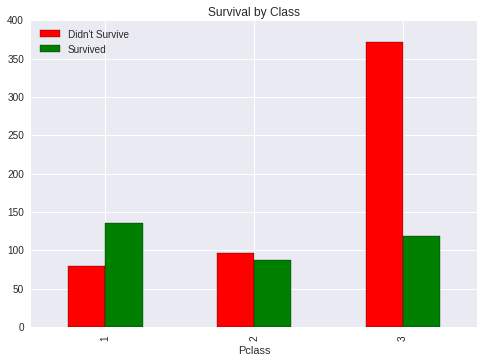

In [79]:
# Grouping by the Class of the passengers
class_grouping = titanic_df[['Pclass', 'Survived']].groupby([ 'Pclass', 'Survived']).size()
class_grouping_unstacked = class_grouping.unstack()
class_grouping_unstacked.columns = ["Didn't Survive", 'Survived']
print class_grouping_unstacked
plt.figure()
class_grouping_unstacked.plot.bar(title="Survival by Class", color=('r', 'g')) 

The above chart depicts the survival by passenger class(ticket class, presumeably). This chart seems to show that...
* passengers from class 1 were more likely to survive. 
* passengers from class 3 were more likely not to survive.
* passengers from class 2 survival rate were quite close to 50%

It seems like passenger class impacted the survival but not as much as sex.

           Didn't Survive  Survived
age_group                          
(0, 5]               13.0      31.0
(5, 10]              13.0       7.0
(10, 15]              8.0      11.0
(15, 20]             63.0      33.0
(20, 25]             80.0      42.0
(25, 30]             66.0      42.0
(30, 35]             47.0      41.0
(35, 40]             39.0      28.0
(40, 45]             30.0      17.0
(45, 50]             23.0      16.0
(50, 55]             14.0      10.0
(55, 60]             11.0       7.0
(60, 65]             10.0       4.0
(65, 70]              3.0       NaN
(70, 75]              4.0       NaN
(75, 80]              NaN       1.0


'\nX = age_grouping_unstacked.index\nY1 = age_grouping_unstacked["Didn\'t Survive"]\nY2 = age_grouping_unstacked["Survived"]\n#Y1.plot.bar(title="Survival by Age", color=(\'r\')) \n#Y2.plot.bar(title="Survival by Age", color=(\'g\')) \n\nn = 12\nX = np.arange(n)\nY1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)\nY2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)\nplt.bar(X, Y1, facecolor=\'#9999ff\', edgecolor=\'white\')\nplt.bar(X, Y2, facecolor=\'#ff9999\', edgecolor=\'white\')\nfor x,y in zip(X,Y1):\n    plt.text(x+0.4, y+0.05, \'%.2f\' % y, ha=\'center\', va= \'bottom\')\nplt.ylim(-1.25,+1.25)\nplt.show()\n'

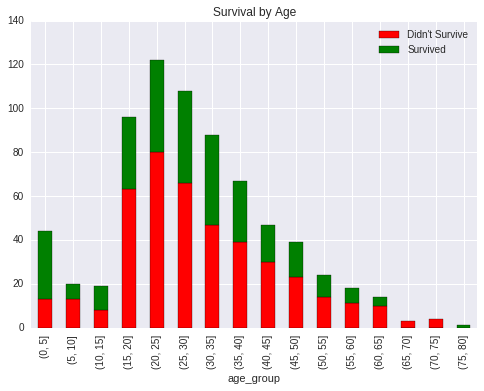

In [129]:
# Grouping by age of the passengers
titanic_df['age_group'] = pd.cut(titanic_df['Age'], np.arange(0, 85, 5))
age_grouping = titanic_df[['age_group', 'Survived']].groupby(['age_group', 'Survived']).size()
age_grouping_unstacked = age_grouping.unstack()
age_grouping_unstacked.columns = ["Didn't Survive", 'Survived']
print age_grouping_unstacked
plt.figure()
age_grouping_unstacked.plot.bar(stacked=True, title="Survival by Age", color=('r', 'g')) 

"""
X = age_grouping_unstacked.index
Y1 = age_grouping_unstacked["Didn't Survive"]
Y2 = age_grouping_unstacked["Survived"]
#Y1.plot.bar(title="Survival by Age", color=('r')) 
#Y2.plot.bar(title="Survival by Age", color=('g')) 

n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
plt.bar(X, Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, Y2, facecolor='#ff9999', edgecolor='white')
for x,y in zip(X,Y1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
plt.ylim(-1.25,+1.25)
plt.show()
"""

Age doesn't seem to have much impact on the survival except for children under the age of 5. The survival rate actually decreases for age group 5-10 before it increases again slightly for age-group 10-15. Maybe, the infants and toddlers had more chance of survival as they would be carried by the surviving mothers. Whereas, children in the age group 5-10 would have to follow the adults instead of being picked up. better survival rate of 10-15 years old could be because pre-teens and teens are more stronger and resourceful then a typical 5-10 year old.   

               Didn't Survive  Survived
Sex    Pclass                          
female 1                    3        91
       2                    6        70
       3                   72        72
male   1                   77        45
       2                   91        17
       3                  300        47


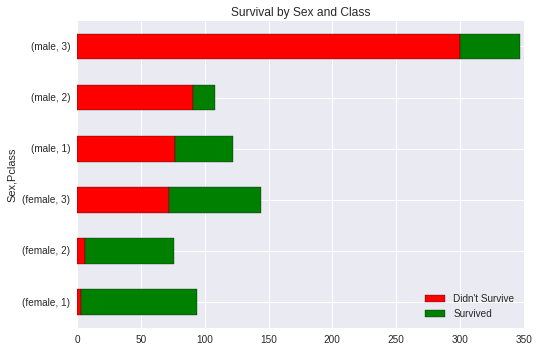

In [124]:
# Group by both sex and class
grouping_by_sexnclass = titanic_df[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass', 'Survived']).size()
grouping_by_sexnclass = grouping_by_sexnclass.unstack()
grouping_by_sexnclass.columns = ["Didn't Survive", 'Survived']
print grouping_by_sexnclass
grouping_by_sexnclass.plot.barh(stacked=True, title="Survival by Sex and Class", color=('r', 'g'))

# Key Findings Summarized

Based on this dataset, below subgroups had better chance of survival..
* females passengers
* class 1 passengers
* children less then 10 years

Below subgroups had lesser chance of survival...
* male passengers
* class 3 passengers
* older passengers

To summarize, sex, class and age had a major impact on whether the passenger survived the titanic sinking or not.
However, these resu;ts are based on the data present and there are exceptions to these findings. There might be other factors impacting the survival outcome(like sheer tenacity of certain passengers).


** Appendix **

Below resources were referred as part of the analysis to get some background information
1. https://www.kaggle.com/c/titanic/data
2. Wikipedia